# The "Perfect" Release Point: Step 2 Analysis for MLB Starting Pitchers
### By: Jonah Charlton

## The first thing we want to look at is the relationships and patterns that make an MLB starting pitchers effective and dominant.

## Step 1. Setup and importing the data and codebooks

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from IPython.display import HTML, Markdown, display
import seaborn as sns
import numpy as np
import shapely
import json
import plotly

In [76]:
pd.set_option('display.max_columns', None)
cleanSP_df = pd.read_csv('../data/Project_Data_Files/Project_Starters.csv')
cleanSP_df.head()

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance,horizontal_release_point,vertical_release_point
0,1893,571760,"Heaney, Andrew",2330,81.2,0.236,0.231,0.273,0.467,0.327,0.295,0.214,95,403,88.9,18.6,2399,87.6,87.03,265,916,977,-0.6,6.11,111,155,118,147,303,325,293,3.41,5.31
1,2566,640455,"Manaea, Sean",2980,86.1,0.256,0.157,0.324,0.414,0.309,0.316,0.256,153,597,89.9,12.3,1848,89.0,90.03,364,1317,1249,1.0,7.18,110,151,120,150,301,326,299,3.31,5.65
2,1971,518516,"Bumgarner, Madison",2294,85.9,0.247,0.192,0.280,0.439,0.315,0.322,0.247,116,469,88.6,18.8,2318,85.7,85.77,215,970,1001,0.1,6.55,109,153,118,149,300,327,296,3.26,5.70
3,2306,669373,"Skubal, Tarik",2547,90.5,0.237,0.239,0.269,0.477,0.329,0.355,0.263,122,514,90.0,14.3,2033,89.5,89.16,305,1134,1172,-0.3,6.21,107,153,118,148,301,327,297,2.97,6.34
4,2155,642232,"Yarbrough, Ryan",2488,86.6,0.282,0.207,0.310,0.489,0.344,0.332,0.279,147,521,83.9,16.5,2081,79.6,79.49,224,1052,1103,-0.1,6.63,105,152,116,149,299,322,291,2.93,5.12


## Table of Contents:

**Block 1** - What are the top 5 starters with the highest release extension (ft)?

**Block 2** - What percentage of starters have a batting average of opponents that is .220 or less?

**Block 3** - How many starters have a vertical release extension above 6.5 ft and produce a batting average at or below .220? What is average batting average against of starters with a vertical release extension above 6.5 ft? 

**Block 4** - Investigate the top five starters that have the high vertical release extension and also create the lowest batting average against. Is there a relationship between the two metrics?

**Block 5** -What is the relationship between release extensions 6.5 and over and whiffs?


# Block 1

### Question: What are the top 5 starters with the highest release extension (ft)?

### Steps:

* Order player names by their release extension 
* Use the head function to retrieve the top 5 starters
* Run the list

In [41]:
# Order dataframe by player name and sort from highest to lowest release extension
release_order = cleanSP_df.groupby('player_name')['release_extension'].mean().sort_values(ascending=False)

# Run the top 5 of the list, which will return the 5 pitchers
highest_release = release_order
highest_release.head()

player_name
Gilbert, Logan    7.41
Ober, Bailey      7.33
Glasnow, Tyler    7.30
Megill, Tylor     7.21
Manaea, Sean      7.18
Name: release_extension, dtype: float64

### ANSWER: 

The five starters that have the highest release extension in the MLB 2021 season are Logan Gilbert, Bailey Ober, Tyler Glasnow, Tylor Megill, and Sean Manaea.

### INTERPRETATION/OBSERVATION:

It is critical to establish a baseline of the starters with the heighest release extension. These names are likely to appear in other calculations as we look into for the following areas.

# Block 2

### Question: What percentage of starters have a batting average of opponents that is .220 or less?

### Steps:

* Create filter for batting average at and below .220
* Subset the data for those players with that filter and sort by batting average
* Calculate percent of that number of players out of the total number of players

In [42]:
# Create a filter for .235 batting average and below
ba_filter = cleanSP_df['ba'] <= .220

# Subset the data for those players based on the filter, sort by batting average
ba_220_below = cleanSP_df[ba_filter].groupby('player_name')['ba'].mean().sort_values(ascending=True)
ba_220_below.head()

player_name
Peralta, Freddy    0.155
Bauer, Trevor      0.161
Glasnow, Tyler     0.176
Manoah, Alek       0.182
Burnes, Corbin     0.182
Name: ba, dtype: float64

#### _A note_
It is worth pointing out that Tyler Glasnow is in both the highest release extension as well as the lowest batting average against.

In [43]:
# Calculate percent of that number of players out of the total number of players in the dataframe
ba220percentage = ((len(ba_220_below))/(len(cleanSP_df)))*100
ba220percentage

20.606060606060606

### ANSWER: 

* 20.6% of the starters within the dataset produce opponents with a batting average of .235 or less.

### INTERPRETATION/OBSERVATION:

After observing the percentage of pitchers that have the lowest opponent batting averages, we can further investigate why the top 20% or so of the dataset produce such low batting averages.

# Block 3

### Question: How many starters have a vertical release extension above 6.5 ft and produce a batting average at or below .220? What is average batting average against of starters with a vertical release extension above 6.5 ft? 

### Steps:

* Create filters where the vertical release extension is above 6.5 ft and batting average against below .220
* Subset the data to run the players within that filter and sort that list by release extension

In [30]:
# Create filter where the vertical release extension is above 6.5 ft and for batting average below .220
above_relext_filters = cleanSP_df[(cleanSP_df['release_extension'] > 6.5) & (cleanSP_df['ba'] <= .220)]

# Group the pitch_filters by players and use the count function
starters_count = above_relext_filters['player_name'].count()

title = 'The number of starters that have a vertical release extension > 6.5 ft and batting average against at or below .220'
print(title)
print('-'*len(title))
starters_count


The number of starters that have a vertical release extension > 6.5 ft and batting average against at or below .220
-------------------------------------------------------------------------------------------------------------------


10

In [34]:
# Create another filter where vertical release extension is at and above 6.5 ft
new_above_relext_filters = cleanSP_df['release_extension'] > 6.5

# Subset the data for those players based on the filter, sort by batting average and use the mean function to find the average
below_ba_avg = cleanSP_df[new_above_relext_filters]['ba'].mean()

title1='Average batting average against for starters with a vertical release extension above 6.5 ft'
print(title1)
print('-'*len(title1))
below_ba_avg


Average batting average against for starters with a vertical release extension above 6.5 ft
-------------------------------------------------------------------------------------------


0.2413888888888889

### ANSWER:

There are 10 starting pitchers pitchers who have a vertical release point above 6.5 ft an also have a batting average against of less than .220 The average batting average against of a starting pitcher that has a release extension of above 6.5 is .241, much higher than these 10 "elite" pitchers.

### INTERPRETATION/OBSERVATION: 

We see that a specific relationship for these 10 pitchers' success is clearly something that matters. Now we will focus on these 10 pitchers, and even the upper echelon 5 pitchers.

# Block 4

### Question: Investigate the top five starters that have the high vertical release extension and also create the lowest batting average against. Is there a relationship between the two metrics?
### Steps:

* Identify the top 5 starters from the last step with the highest release extensions
* Create a function within the subset that sorts the values by release extension and returns only the top 5 pitchers
* Plot the findings

In [142]:
# Identify the 5 starters with the combination of low batting average against and high release extension
above_relext_filters.head()

# Create a function within the subset that sorts the values by release extension and returns only the top 5 pitchers
top5 = above_relext_filters.sort_values('release_extension', ascending=False).head()
top5

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance
157,1047,607192,"Glasnow, Tyler",1339,78.2,0.176,0.131,0.257,0.306,0.240,0.241,0.175,43,245,90.8,11.9,2599,92.1,93.51,191,518,529,1.4,7.30,108,159,118,150,302,322,294
65,2018,642547,"Peralta, Freddy",2356,85.7,0.155,0.141,0.220,0.296,0.244,0.249,0.170,67,433,86.2,19.9,2258,87.7,84.88,322,920,1098,-2.8,7.17,111,155,118,148,298,321,297
23,2339,554430,"Wheeler, Zack",3205,73.0,0.203,0.087,0.282,0.290,0.240,0.248,0.210,115,566,83.5,6.7,2361,94.1,95.03,314,1185,1154,0.9,7.15,111,152,113,149,294,322,293
53,2123,605483,"Snell, Blake",2347,90.5,0.220,0.164,0.303,0.383,0.313,0.340,0.236,94,428,88.2,10.9,2315,90.3,90.80,292,935,1188,0.5,6.78,112,152,124,146,301,323,311
96,1689,660271,"Ohtani, Shohei",2027,83.3,0.214,0.153,0.277,0.366,0.286,0.284,0.211,84,393,88.0,10.5,2122,89.6,90.04,224,805,884,0.4,6.78,114,158,116,150,304,326,298


[Text(0.5, 1.0, 'SP - Batting Average Against vs Release Extension')]

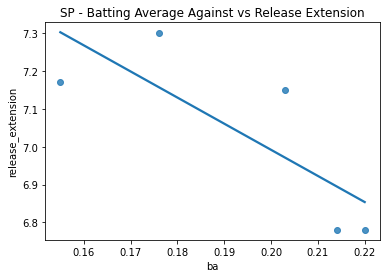

In [75]:
# Show a plot analysis for what insight you discovered depending on the metric used
sns.regplot(x="ba", y="release_extension", ci=None, data = top5).set(title = 'SP - Batting Average Against vs Release Extension')

### ANSWER: 

By further investigating the top 5 starters with the highest release extensions, we find that there is a strong relationship between batting average against and the release extension. Tyler Glasnow's 7.30 release extension leads to one of the lowest batting average against scores, only outdone by Freddy Peralta who has a similarly high 7.17 release extension.

### INTERPRETATION/OBSERVATION:

This step builds off of our prior result in Block 3, which worked on the releationship between release extension and batting average against. We see that the higher release extensions tends to lead to a lower batting average against and we can note that it is definitely a key metric for judging success.

# Block 5

### Question: What is the relationship between release extensions 6.5 and over and whiffs?

### Steps:

* Create a subset with player name, release extension, and whiffs and filter for top result
* Plot the relationship between release extension and whiffs, a key metric in the ability to get a batter out
* Create a function within the subset that sorts the values by whiffs



In [131]:
# Create a subset with player name, release extension, and whiffs and filter for top result
subset = above_relext_filters[['player_name', 'release_extension', 'whiffs']]
subset

,player_name,release_extension,whiffs
23,"Wheeler, Zack",7.15,314
53,"Snell, Blake",6.78,292
65,"Peralta, Freddy",7.17,322
72,"Rogers, Trevor",6.66,296
84,"Webb, Logan",6.75,255
93,"McKenzie, Triston",6.76,222
96,"Ohtani, Shohei",6.78,224
109,"Manoah, Alek",6.58,227
147,"Flaherty, Jack",6.71,146
157,"Glasnow, Tyler",7.30,191


[Text(0.5, 1.0, 'SP - Release Extension vs Whiffs')]

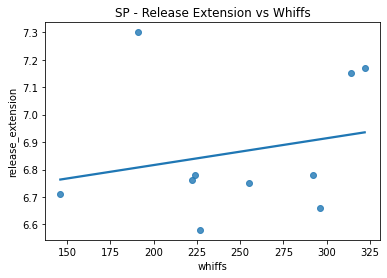

In [137]:
# Plot the relationship between release extension and whiffs
sns.regplot(x="whiffs", y="release_extension", ci=None, data = subset_release_extension).set(title = 'SP - Release Extension vs Whiffs')

In [140]:
# Create a function within the subset that sorts the values by whiffs
highest_extension = subset.sort_values('whiffs', ascending=False).head()
highest_extension

,player_name,release_extension,whiffs
65,"Peralta, Freddy",7.17,322
23,"Wheeler, Zack",7.15,314
72,"Rogers, Trevor",6.66,296
53,"Snell, Blake",6.78,292
84,"Webb, Logan",6.75,255


### ANSWER: 
There is a positive relationship between release extension and whiffs. The starter with the highest number of whiffs is Freddy Peralta, a name we have seen pop up a number of times and exhibits the second highest release extension. The highest release extension — which belongs to Tyler Glasnow — falls behind and is an outlier on the positive correlation here; this is due to the fact that Glasnow was injured mid-season and faced fewer hitters. Without Glasnow, the relationship will appear even more positive.

### INTERPRETATION/OBSERVATION:

Throughout the Blocks, we have built upon the notions regarding the stark importance of release extension to the success of starting pitchers in the MLB. In this block we see again that there is an important relationship between release extension and whiffs, another important indicator of success for a starting pitcher.